In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

import prep

In [2]:
zillow = prep.acquire_and_prep_data()
zillow

,id,bathroomcnt,bedroomcnt,calculatedbathnbr,squarefeet,fullbathcnt,latitude,longitude,yearbuilt,taxvaluedollarcnt,taxrate,County,State
0,2061546,2.0,3,2.0,1458,2,34.686163,-118.113100,1970,136104,1.70,Los Angeles,CA
1,1834372,1.0,2,1.0,1421,1,33.999877,-118.291863,1911,35606,1.53,Los Angeles,CA
2,1923117,3.0,4,3.0,2541,3,33.694636,-117.912245,2003,880456,1.12,Orange,CA
3,2121349,2.0,3,2.0,1650,2,33.985377,-118.361620,1949,614000,1.25,Los Angeles,CA
4,2093710,1.0,2,1.0,693,1,34.112946,-118.208106,1921,274237,1.19,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20343,2922089,2.0,2,2.0,1030,2,34.150300,-118.468000,1988,359829,1.22,Los Angeles,CA
20344,1948691,2.0,3,2.0,1536,2,34.058178,-117.948180,1955,297097,1.18,Los Angeles,CA
20345,444575,3.0,5,3.0,2655,3,33.836898,-117.801369,1994,746963,1.08,Orange,CA
20346,1480299,3.0,4,3.0,2305,3,33.952368,-118.441155,1949,579047,1.21,Los Angeles,CA


## So first off lets, the zillow team wanted a viz of the distribution of tax rates by county

(array([1.822e+03, 3.940e+03, 3.400e+01, 5.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.000e-02, 1.083e+00, 2.156e+00, 3.229e+00, 4.302e+00, 5.375e+00,
        6.448e+00, 7.521e+00, 8.594e+00, 9.667e+00, 1.074e+01]),
 <a list of 10 Patch objects>)

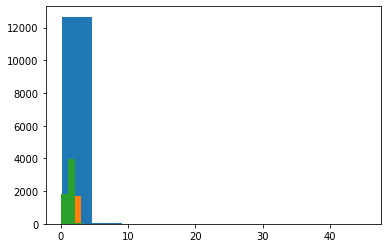

In [3]:
plt.hist(zillow.taxrate[zillow.County == 'Los Angeles'])
plt.hist(zillow.taxrate[zillow.County == 'Ventura'])
plt.hist(zillow.taxrate[zillow.County == 'Orange'])

### So we can see that their are some outliers so lets lose those and see what happens

In [4]:
zillow_tax = zillow[zillow.taxrate < 3]
zillow_tax

,id,bathroomcnt,bedroomcnt,calculatedbathnbr,squarefeet,fullbathcnt,latitude,longitude,yearbuilt,taxvaluedollarcnt,taxrate,County,State
0,2061546,2.0,3,2.0,1458,2,34.686163,-118.113100,1970,136104,1.70,Los Angeles,CA
1,1834372,1.0,2,1.0,1421,1,33.999877,-118.291863,1911,35606,1.53,Los Angeles,CA
2,1923117,3.0,4,3.0,2541,3,33.694636,-117.912245,2003,880456,1.12,Orange,CA
3,2121349,2.0,3,2.0,1650,2,33.985377,-118.361620,1949,614000,1.25,Los Angeles,CA
4,2093710,1.0,2,1.0,693,1,34.112946,-118.208106,1921,274237,1.19,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20343,2922089,2.0,2,2.0,1030,2,34.150300,-118.468000,1988,359829,1.22,Los Angeles,CA
20344,1948691,2.0,3,2.0,1536,2,34.058178,-117.948180,1955,297097,1.18,Los Angeles,CA
20345,444575,3.0,5,3.0,2655,3,33.836898,-117.801369,1994,746963,1.08,Orange,CA
20346,1480299,3.0,4,3.0,2305,3,33.952368,-118.441155,1949,579047,1.21,Los Angeles,CA


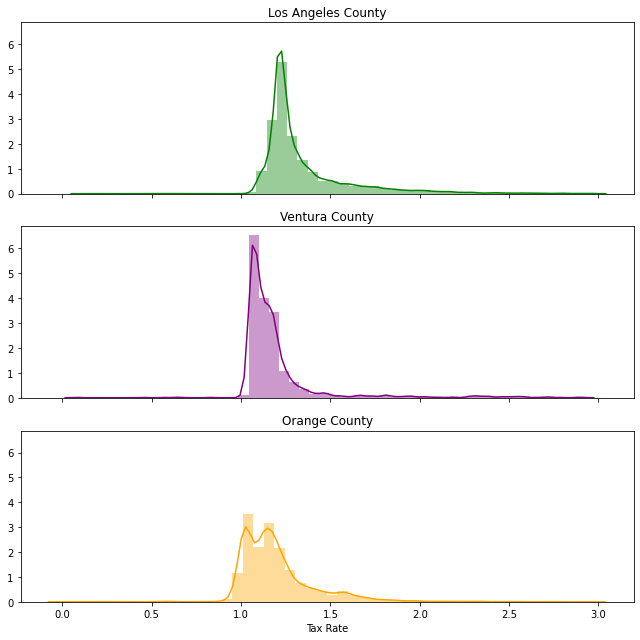

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(9, 9), sharex=True, sharey=True)

sns.distplot(zillow_tax.taxrate[zillow_tax.County == 'Los Angeles'], ax=axs[0], color='green')
axs[0].set_title('Los Angeles County')
axs[0].set_xlabel('')
sns.distplot(zillow_tax.taxrate[zillow_tax.County == 'Ventura'], ax=axs[1], color='purple')
axs[1].set_title('Ventura County')
axs[1].set_xlabel('')
sns.distplot(zillow_tax.taxrate[zillow_tax.County == 'Orange'], ax=axs[2], color='orange')
axs[2].set_title('Orange County')
axs[2].set_xlabel('Tax Rate')
plt.tight_layout()

## Now that we have made that graph for the team lets split our data and get to some exploration

In [6]:
zillow = zillow.drop(columns=['id', 'taxrate', 'County', 'State'])
zillow

,bathroomcnt,bedroomcnt,calculatedbathnbr,squarefeet,fullbathcnt,latitude,longitude,yearbuilt,taxvaluedollarcnt
0,2.0,3,2.0,1458,2,34.686163,-118.113100,1970,136104
1,1.0,2,1.0,1421,1,33.999877,-118.291863,1911,35606
2,3.0,4,3.0,2541,3,33.694636,-117.912245,2003,880456
3,2.0,3,2.0,1650,2,33.985377,-118.361620,1949,614000
4,1.0,2,1.0,693,1,34.112946,-118.208106,1921,274237
...,...,...,...,...,...,...,...,...,...
20343,2.0,2,2.0,1030,2,34.150300,-118.468000,1988,359829
20344,2.0,3,2.0,1536,2,34.058178,-117.948180,1955,297097
20345,3.0,5,3.0,2655,3,33.836898,-117.801369,1994,746963
20346,3.0,4,3.0,2305,3,33.952368,-118.441155,1949,579047


In [7]:
train, test = train_test_split(zillow)
train.shape[0], test.shape[0]

(15135, 5046)

## Great now lets look at the relationships between these features

### Let's start with a pairplot

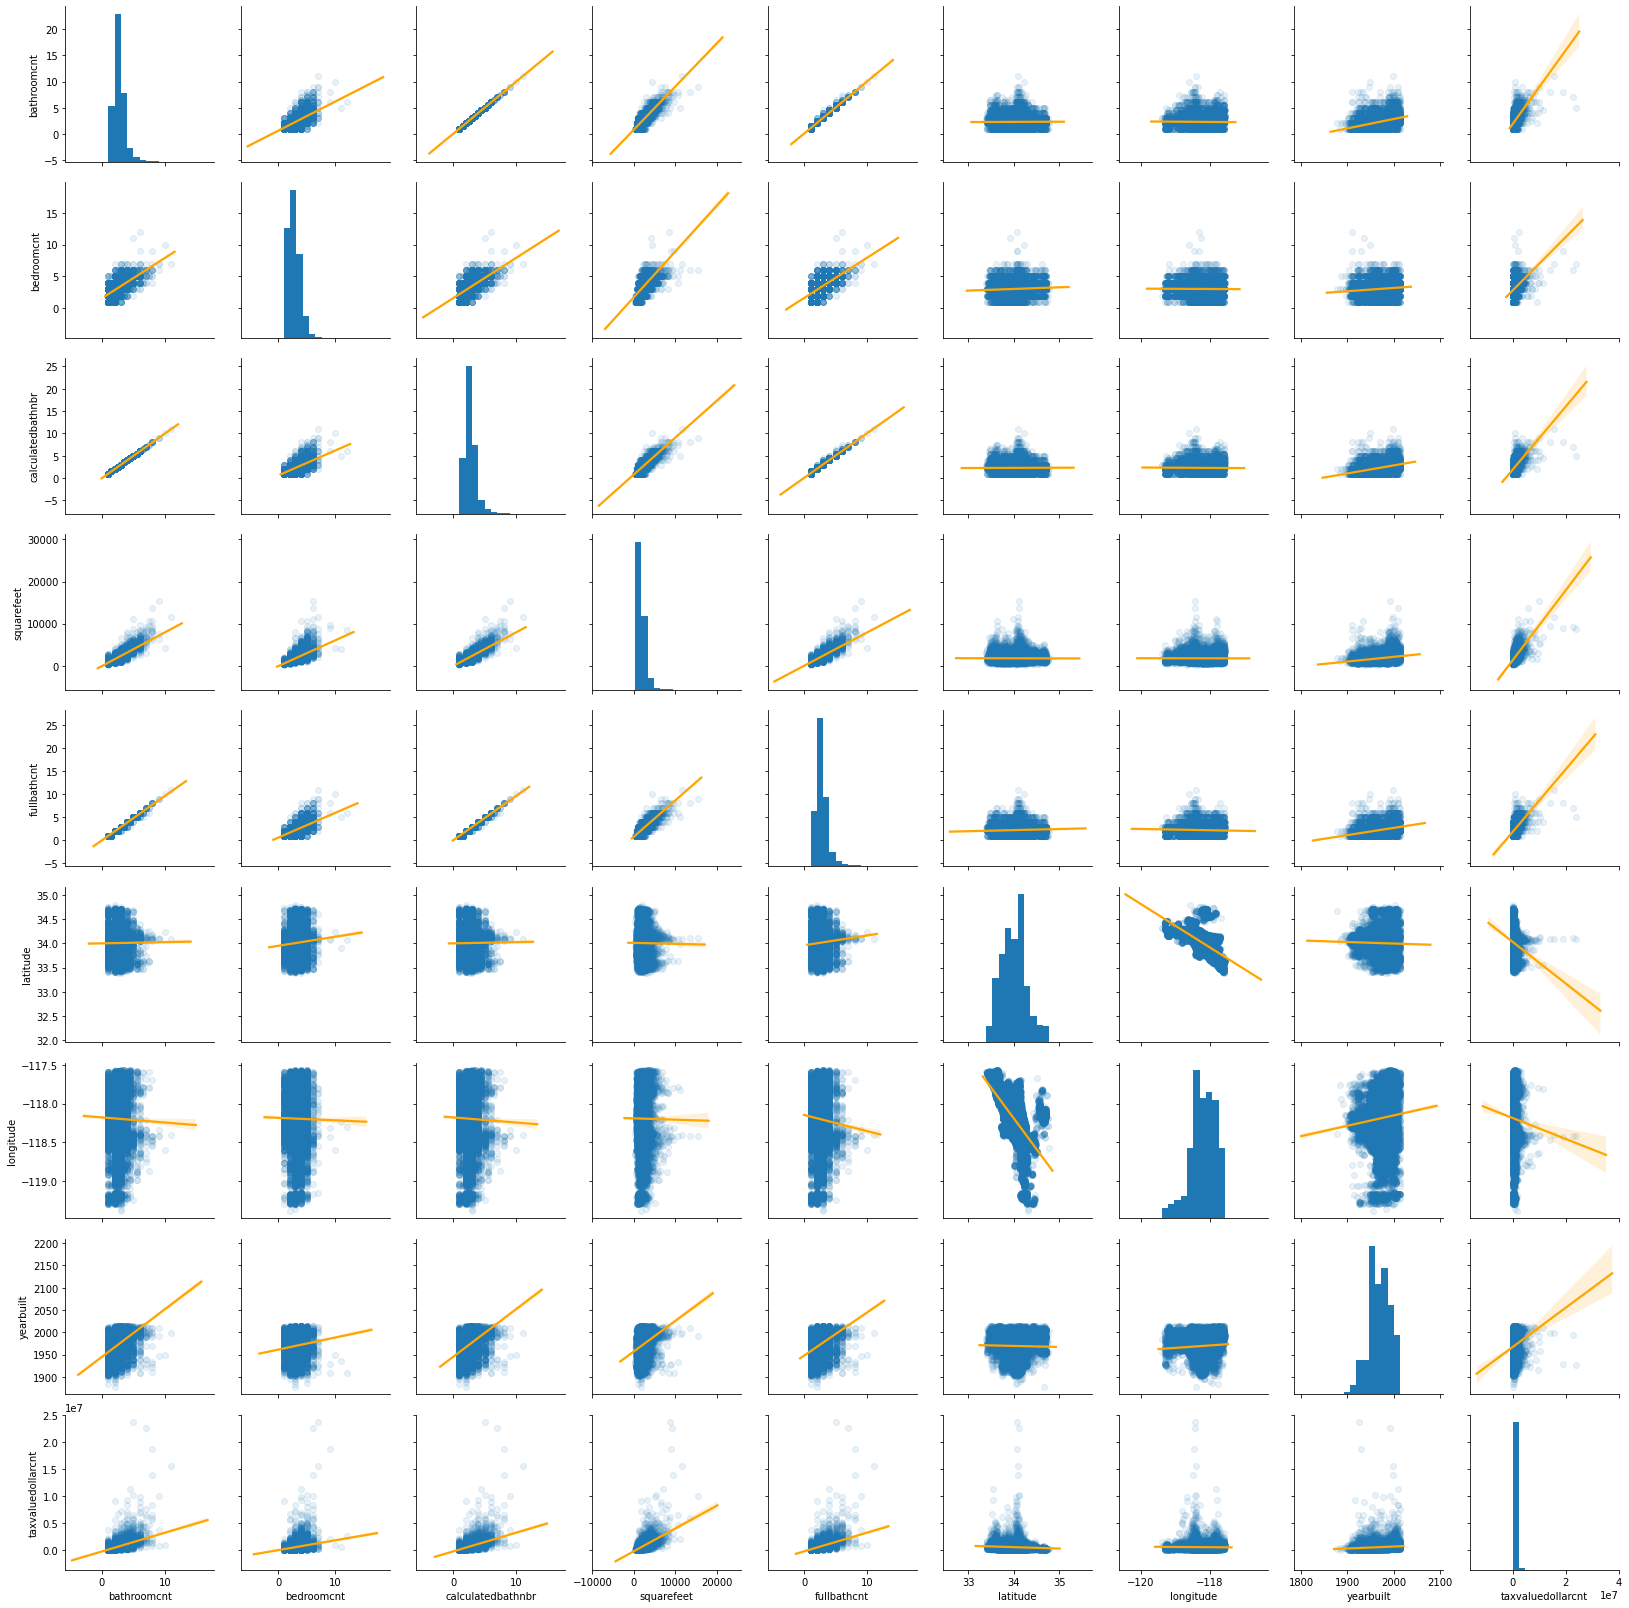

In [8]:
sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'orange'}, 'scatter_kws': {'alpha': 0.1}})

### Takeaways from the pairplot

* All the features that have a pretty tight relationship so this would need to be addressed
* They seem pretty equally matched on the linear regression against taxvaluedollarcnt

### Lets take a look at the correlations

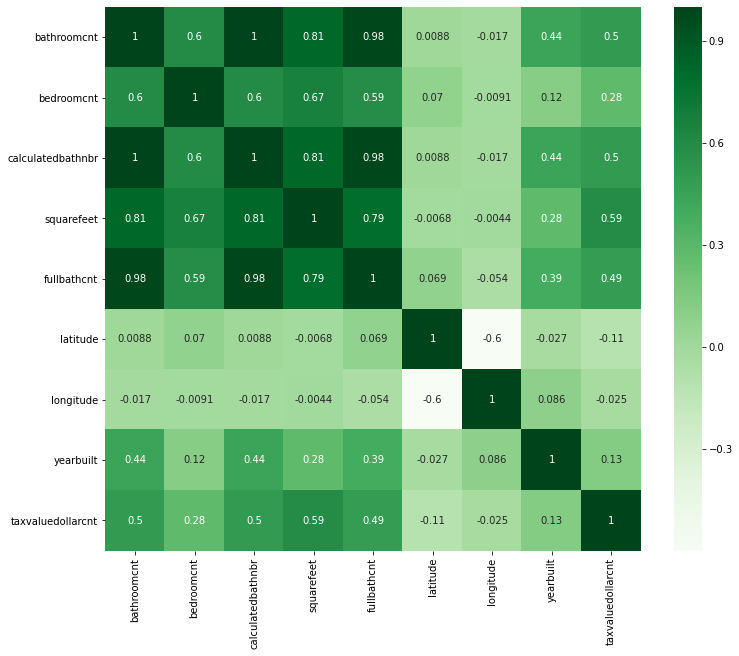

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), annot=True, cmap='Greens')

#### Takeaways
* Here it looks like latitude will probably perform the worst
* Square feet will probably perform the best

### That pairplot is a little messy so lets get a look at just the plots against the property value.

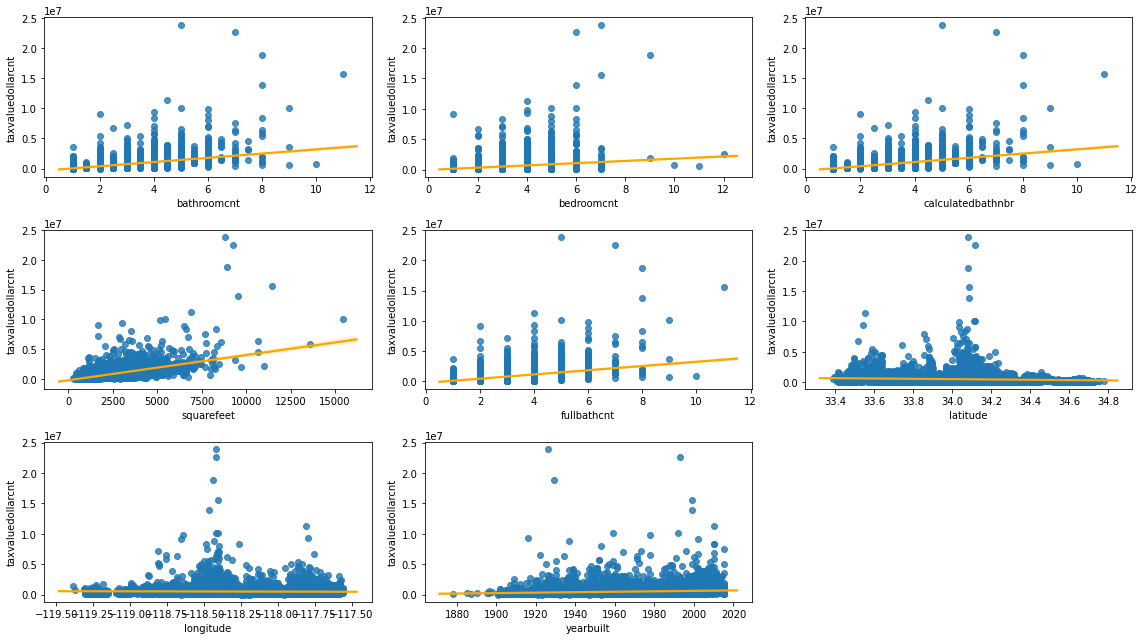

In [10]:
plt.figure(figsize=(16, 9))

for i in range(1, 9):
    plt.subplot(3, 3, i)
    sns.regplot(x=train.columns[i-1], y='taxvaluedollarcnt', data=train, line_kws={'color':'orange'})

plt.tight_layout()

#### Takeaways

* The linear realationship between each of these seems to miss the higher property values more often.
    * Maybe they will work better together and that is something we can investigate in the feature engineering.
    * We might want to limit how high a property value we can predict by eliminating outliers, but we will leave that for if we have time later.
    
### During feature engineering I add some new features so let's add them to the visuals

In [11]:
train['beds_per_bath'] = zillow.bedroomcnt / zillow.bathroomcnt
train['baths_per_beds'] = zillow.bathroomcnt / zillow.bedroomcnt
train['sqft_per_bed_and_bath'] = zillow.squarefeet / (zillow.bathroomcnt + zillow.bedroomcnt)

train

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,bathroomcnt,bedroomcnt,calculatedbathnbr,squarefeet,fullbathcnt,latitude,longitude,yearbuilt,taxvaluedollarcnt,beds_per_bath,baths_per_beds,sqft_per_bed_and_bath
5102,4.0,4,4.0,2653,4,33.709455,-117.744965,2014,814935,1.000000,1.000000,331.625000
16826,2.5,4,2.5,2552,2,33.820918,-118.038026,1976,399948,1.600000,0.625000,392.615385
7763,2.0,3,2.0,999,2,33.978300,-117.854000,1987,437000,1.500000,0.666667,199.800000
3633,5.5,5,5.5,5458,5,33.566027,-117.581072,2000,1868000,0.909091,1.100000,519.809524
17717,3.0,5,3.0,2941,3,34.461024,-118.513110,1998,655000,1.666667,0.600000,367.625000
...,...,...,...,...,...,...,...,...,...,...,...,...
19386,2.0,1,2.0,1665,2,33.996097,-118.045227,1951,262199,0.500000,2.000000,555.000000
18168,3.0,4,3.0,2701,3,33.865466,-118.375859,1987,902602,1.333333,0.750000,385.857143
20115,2.0,3,2.0,1457,2,34.083649,-117.725302,1956,508000,1.500000,0.666667,291.400000
12096,3.0,4,3.0,2662,3,34.196998,-118.658346,1984,682070,1.333333,0.750000,380.285714


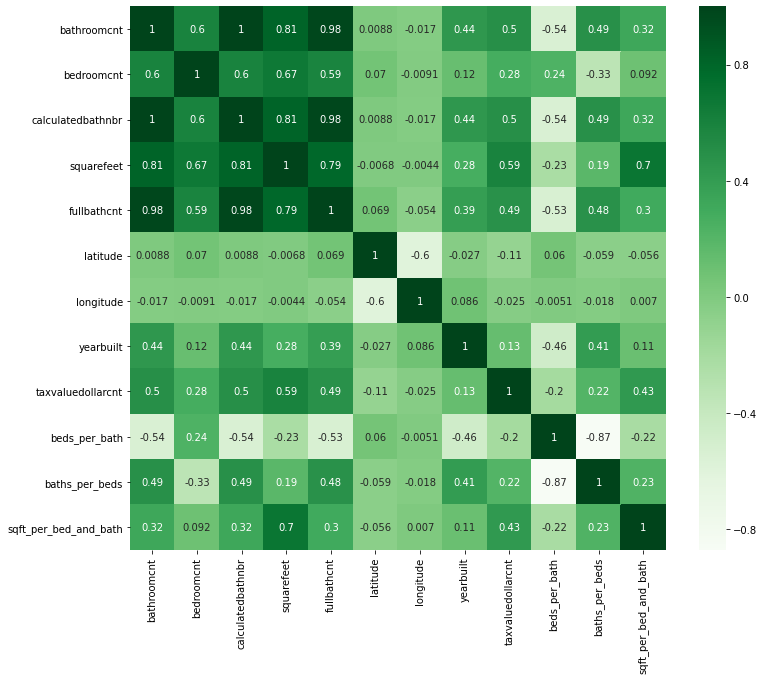

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), annot=True, cmap='Greens')

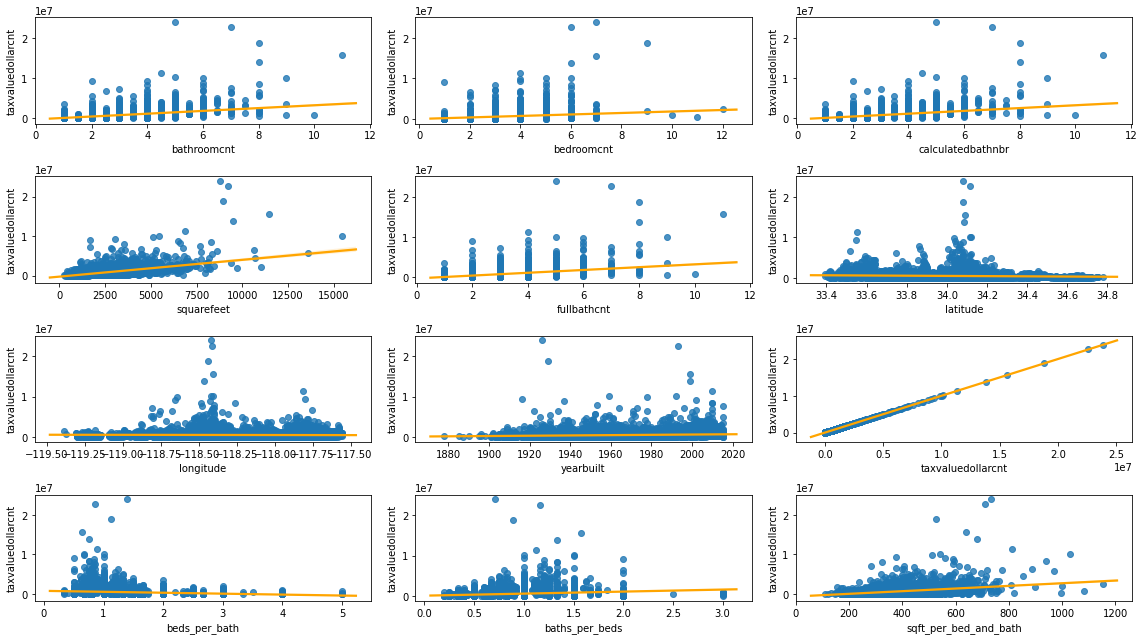

In [13]:
plt.figure(figsize=(16, 9))

for i in range(1, 13):
    plt.subplot(4, 3, i)
    sns.regplot(x=train.columns[i-1], y='taxvaluedollarcnt', data=train, line_kws={'color':'orange'})

plt.tight_layout()